In [70]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib,statsmodels,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.3
IPython 7.4.0

sklearn 0.20.3
numpy 1.16.2
scipy 1.2.1
matplotlib 3.0.3
statsmodels 0.9.0
seaborn 0.9.0


In [71]:
import warnings
warnings.filterwarnings('ignore')

# **<로지스틱 회귀분석 실습>**

In [72]:
%matplotlib inline
# 분석에 필요한 패키지 불러오기
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time
import sklearn.preprocessing as preprocessing
import seaborn as sns


### **데이터 불러오기**

In [73]:
# 현재경로 확인
os.getcwd()

'/media/seok/SSD2/dev/Lecture/3day_Regression&Logistic_Programing_Lecture_0709/3day_Regression&Logistic_Programing_Lecture'

In [74]:
ploan = pd.read_csv("./data/personal_loan.csv")
print( ploan.head(10) )

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0

## **데이터 전처리**

#### **['ID','ZIP Code']** 와 같은 명목형 자료의 경우 본 데이터의 목적에 부합하는 변수가 아니라고 판단하여 이를 제거 하겠습니다.

In [75]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

## **상수항 추가**

#### 로지스틱 회귀분석에 있어서 상수(절편)에 해당하는 회귀계수를 알아가기 위해서 상수 변수를 추가하겠습니다.

In [76]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
print(ploan_processed.head(10) )

   const  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0    1.0   25           1      49       4    1.6          1         0   
1    1.0   45          19      34       3    1.5          1         0   
2    1.0   39          15      11       1    1.0          1         0   
3    1.0   35           9     100       1    2.7          2         0   
4    1.0   35           8      45       4    1.0          2         0   
5    1.0   37          13      29       4    0.4          2       155   
6    1.0   53          27      72       2    1.5          2         0   
7    1.0   50          24      22       1    0.3          3         0   
8    1.0   35          10      81       3    0.6          2       104   
9    1.0   34           9     180       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0      

## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 

In [77]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [78]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [79]:
ploan_processed.dtypes

const                 float64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# 로지스틱회귀모형 모델링 y = f(x)

앞서 실습한 회귀분석과 마찬가지로 로지스틱 회귀모델도 statsmodels와 scikit-learn 두가지 패키지 모두 제공하고 있습니다. 우선적으로, statsmodels 패키지를 이용하여 로지스틱회귀모형을 적합하는 실습을 진행하도록 하겟습니다.

In [80]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


|Element|Description|
|:----|:-----------|
|coef|	The estimated value of the coefficient|
|std err|	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.|
|t	|The t-statistic value. This is a measure of how statistically significant the coefficient is.|
|P > ㅣtㅣ|	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.|
|[95.0% Conf. Interval]|The lower and upper values of the 95% confidence interval|

In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 16 Jul 2019   Pseudo R-squ.:                  0.6030
Time:                        21:52:04   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
                                        LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [82]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))

model AIC:  482.69329


# Cut-off에 따른 성능변화

In [83]:
pred_y = results.predict(train_x)
print(pred_y.head(10))

195     0.000041
2177    0.006228
1978    0.000599
1589    0.069734
1419    0.000051
77      0.002509
2172    0.017191
1416    0.004126
733     0.001416
648     0.000538
dtype: float64


## ***cut-off***: 확률값을 특정 임계값에 따라 범주형으로 변환하는 함수

In [84]:
# Cut-off에 따른 Confusion Matrix 변화
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
print(pred_Y.head(10))

195     0
2177    0
1978    0
1589    0
1419    0
77      0
2172    0
1416    0
733     0
648     0
dtype: int64


## **Confusion matrix**

In [85]:
len(train_y)

1750

In [86]:
cfmat = confusion_matrix(train_y,pred_Y)
print(cfmat)


[[1550   21]
 [  60  119]]


### Compute confusion matrix to evaluate the accuracy of a classification
By definition a confusion matrix $ `C` $ is such that $C_{i, j}$
    is equal to the number of observations known to be in group $i$ but
    predicted to be in group $j$.
    Thus in binary classification, the count of true negatives is
    $ C_{0,0} $, false negatives is $C_{1,0}$, true positives is
    $C_{1,1} $ and false positives is $C_{0,1}$.


## perf_eval: 혼동행렬(confusion matrix)을 평가지표로 바꾸는 함수

<img src='fig/4.png'>

<img src='fig/5.png'>

In [87]:
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])
print('TPR:',perf_eval(cfmat)[0])
print('TNR:',perf_eval(cfmat)[1])
print('ACC:',perf_eval(cfmat)[2])
print('BCR:',perf_eval(cfmat)[3])
print('F1:',perf_eval(cfmat)[4])

TPR: 0.664804469273743
TNR: 0.9866327180140039
ACC: 0.9537142857142857
BCR: 0.809887548038251
F1: 0.7460815047021944


## **임계값(cut-off)**에 따른 성능지표 비교

In [88]:
# 임계값에 따른 비교
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['TPR','TNR','ACC','BCR','F1'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(train_y, pred_Y)
    table.loc[i] = perf_eval(cfmat)
table.index.name='threshold'
table.columns.name='performance'
print( table )

performance       TPR       TNR       ACC       BCR        F1
threshold                                                    
0.0          1.000000  0.000000  0.102286  0.000000  0.185588
0.1          0.865922  0.886696  0.884571  0.876248  0.605469
0.2          0.815642  0.940165  0.927429  0.875693  0.696897
0.3          0.754190  0.960535  0.939429  0.851132  0.718085
0.4          0.709497  0.975175  0.948000  0.831796  0.736232
0.5          0.664804  0.986633  0.953714  0.809888  0.746082
0.6          0.608939  0.994908  0.955429  0.778356  0.736486
0.7          0.541899  0.996817  0.950286  0.734966  0.690391
0.8          0.446927  1.000000  0.943429  0.668526  0.617761
0.9          0.379888  1.000000  0.936571  0.616351  0.550607


## Simple ROC curve

AUC: 0.9576649396000838


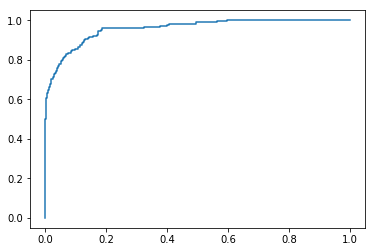

In [89]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(train_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

## **plot_ROC**: 학습데이터와 평가데이터의 ROC 커브와 최적의 임계값 확인

Train Accuracy: 0.8737142857142857 
Train AUC: 0.8851121407920799 
Train Confusion Matrix:
[[1368  203]
 [  18  161]]
Test Accuracy: 0.8973333333333333 
Test AUC: 0.9082900754520368 
Test Confusion Matrix:
[[602  71]
 [  6  71]]


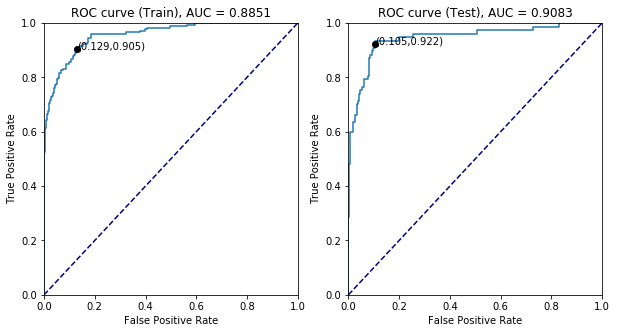

Cut-off: 0.08299372344177953


In [90]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold

BestThreshold = plot_ROC(y_train_true=train_y, y_train_prob=results.predict(train_x),
         y_test_true=test_y, y_test_prob=results.predict(test_x))
print('Cut-off:', BestThreshold) # for training data

In [91]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
os.getcwd()

'/media/seok/SSD2/dev/Lecture/3day_Regression&Logistic_Programing_Lecture_0709/3day_Regression&Logistic_Programing_Lecture'

In [93]:
# 데이터 불러오기
print
dat_dir = './data/'
dat = pd.read_csv('./data/classification_universalbank.csv')
# 데이터 예시 확인
print( dat.head(20) )


    ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0    1   25           1      49     91107       4    1.6          1         0   
1    2   45          19      34     90089       3    1.5          1         0   
2    3   39          15      11     94720       1    1.0          1         0   
3    4   35           9     100     94112       1    2.7          2         0   
4    5   35           8      45     91330       4    1.0          2         0   
5    6   37          13      29     92121       4    0.4          2       155   
6    7   53          27      72     91711       2    1.5          2         0   
7    8   50          24      22     93943       1    0.3          3         0   
8    9   35          10      81     90089       3    0.6          2       104   
9   10   34           9     180     93023       1    8.9          3         0   
10  11   65          39     105     94710       4    2.4          3         0   
11  12   29           5     

In [94]:
dat.shape

(5000, 14)

In [95]:
# 의미없는 변수 제거: ID, ZIP Code
dat_processing = dat.drop(['ID','ZIP Code'], axis=1, inplace=False)
dat_processing.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [96]:
# Normalization
dat_processing_norm = preprocessing.minmax_scale(dat_processing)
dat_processed = pd.DataFrame(dat_processing_norm)
dat_processed.columns = dat_processing.columns

In [97]:
dat_processed.shape


(5000, 12)

In [98]:
print(dat_processed.head(10))

        Age  Experience    Income    Family  CCAvg  Education  Mortgage  \
0  0.045455    0.086957  0.189815  1.000000   0.16        0.0  0.000000   
1  0.500000    0.478261  0.120370  0.666667   0.15        0.0  0.000000   
2  0.363636    0.391304  0.013889  0.000000   0.10        0.0  0.000000   
3  0.272727    0.260870  0.425926  0.000000   0.27        0.5  0.000000   
4  0.272727    0.239130  0.171296  1.000000   0.10        0.5  0.000000   
5  0.318182    0.347826  0.097222  1.000000   0.04        0.5  0.244094   
6  0.681818    0.652174  0.296296  0.333333   0.15        0.5  0.000000   
7  0.613636    0.586957  0.064815  0.000000   0.03        1.0  0.000000   
8  0.272727    0.282609  0.337963  0.666667   0.06        0.5  0.163780   
9  0.250000    0.260870  0.796296  0.000000   0.89        1.0  0.000000   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0            0.0                 1.0         0.0     0.0         0.0  
1            0.0                

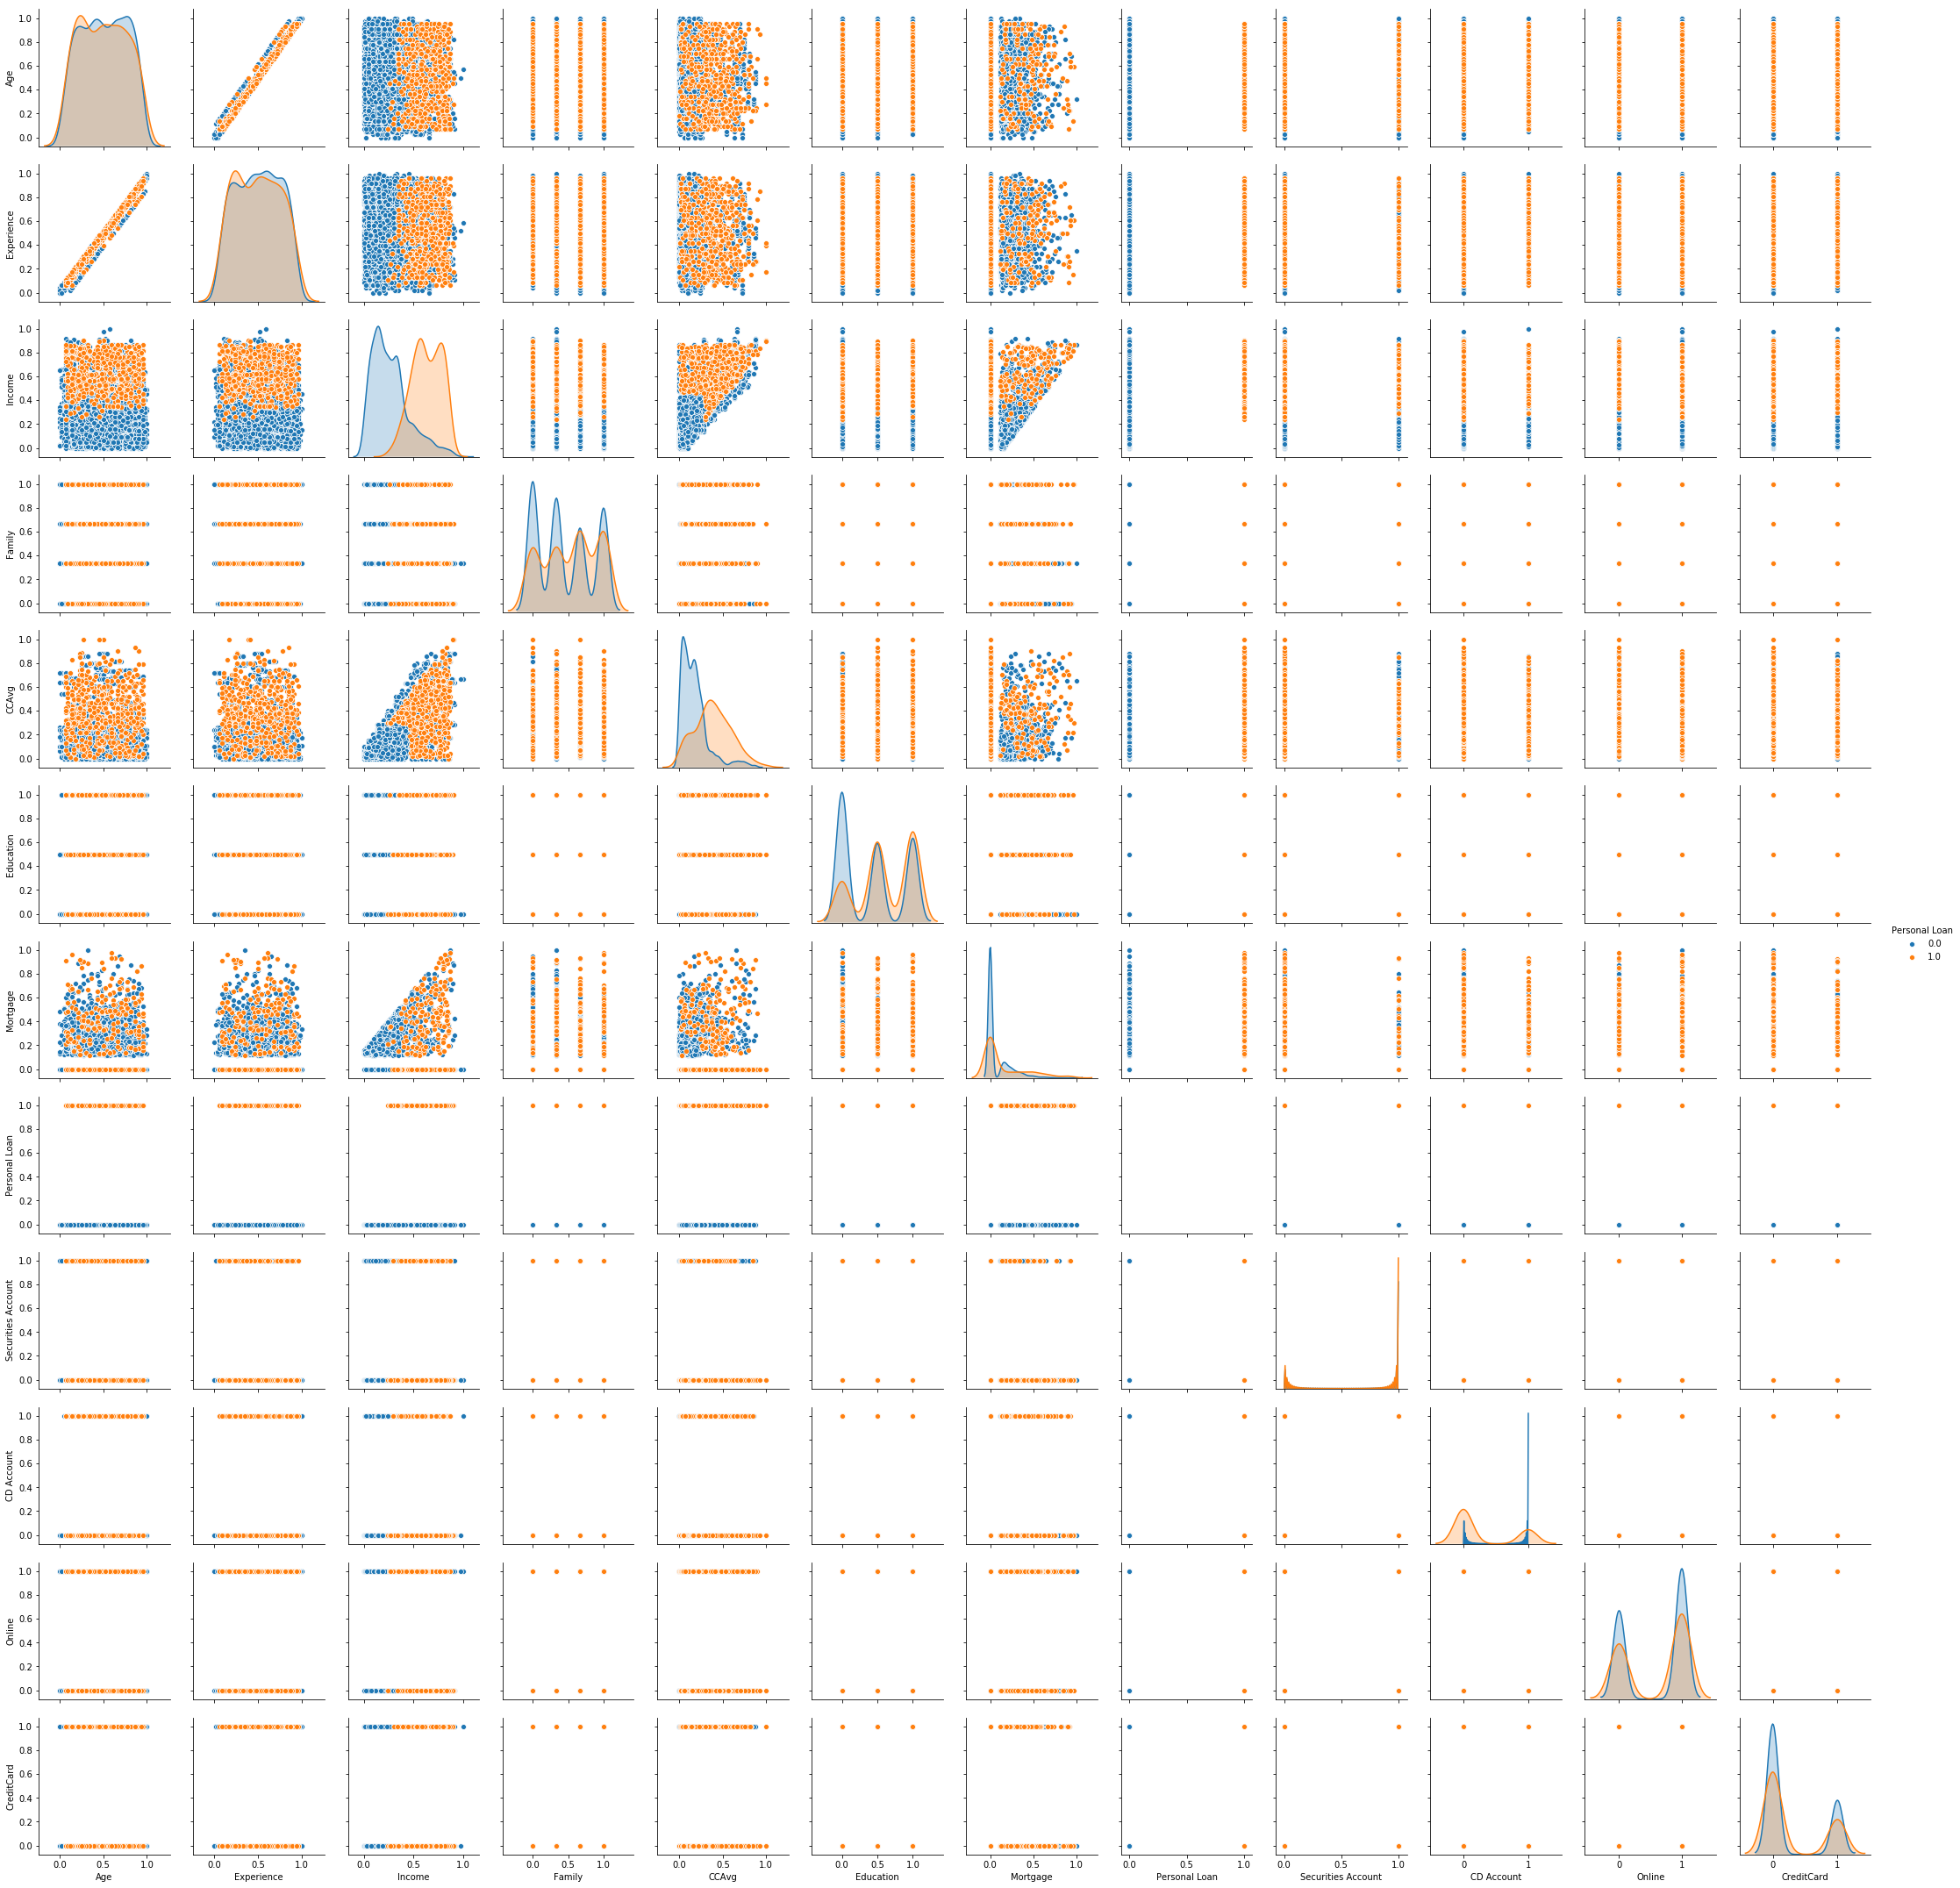

In [99]:
# EDA
# scatter plot
#sns.set(style='whitegrid', context='notebook')
sns.pairplot(dat_processed, hue="Personal Loan")
plt.show()

In [100]:
# 상수항 추가
dat_processed = sm.add_constant(dat_processed, has_constant='add')
print(dat_processed.head(20))

    const       Age  Experience    Income    Family  CCAvg  Education  \
0     1.0  0.045455    0.086957  0.189815  1.000000   0.16        0.0   
1     1.0  0.500000    0.478261  0.120370  0.666667   0.15        0.0   
2     1.0  0.363636    0.391304  0.013889  0.000000   0.10        0.0   
3     1.0  0.272727    0.260870  0.425926  0.000000   0.27        0.5   
4     1.0  0.272727    0.239130  0.171296  1.000000   0.10        0.5   
5     1.0  0.318182    0.347826  0.097222  1.000000   0.04        0.5   
6     1.0  0.681818    0.652174  0.296296  0.333333   0.15        0.5   
7     1.0  0.613636    0.586957  0.064815  0.000000   0.03        1.0   
8     1.0  0.272727    0.282609  0.337963  0.666667   0.06        0.5   
9     1.0  0.250000    0.260870  0.796296  0.000000   0.89        1.0   
10    1.0  0.954545    0.913043  0.449074  1.000000   0.24        1.0   
11    1.0  0.136364    0.173913  0.171296  0.666667   0.01        0.5   
12    1.0  0.568182    0.565217  0.490741  0.333333

In [101]:
dat_processed.columns

Index(['const', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [102]:
dat_processed.columns.difference(["Personal Loan"])

Index(['Age', 'CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience',
       'Family', 'Income', 'Mortgage', 'Online', 'Securities Account',
       'const'],
      dtype='object')

In [103]:
feature_columns = list(dat_processed.columns.difference(["Personal Loan"]))
feature_columns

['Age',
 'CCAvg',
 'CD Account',
 'CreditCard',
 'Education',
 'Experience',
 'Family',
 'Income',
 'Mortgage',
 'Online',
 'Securities Account',
 'const']

In [104]:
X = dat_processed[feature_columns]
y = dat_processed['Personal Loan'] # 대출여부: 1 or 0

In [105]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=2017010500)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3500, 12) (1500, 12) (3500,) (1500,)


In [106]:
dat_processed.dtypes


const                 float64
Age                   float64
Experience            float64
Income                float64
Family                float64
CCAvg                 float64
Education             float64
Mortgage              float64
Personal Loan         float64
Securities Account    float64
CD Account            float64
Online                float64
CreditCard            float64
dtype: object

In [107]:
# 모델 구축 및 학습
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.126211
         Iterations 9


In [108]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))
print("model BIC: ","{:.5f}".format(results.bic))
results.summary()

model AIC:  907.47757
model BIC:  981.40379


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Tue, 16 Jul 2019   Pseudo R-squ.:                  0.6009
Time:                        21:52:23   Log-Likelihood:                -441.74
converged:                       True   LL-Null:                       -1106.7
                                        LLR p-value:                1.554e-278
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -3.5613      3.199     -1.113      0.266      -9.831       2.708
CCAvg                  1.1306      0.476      2.374      0.018       0.197       2.064
CD Account             3.9763      0.391     10.168      0.000       3.210       4.743
CreditCard            -1.1714      0.257     -4.558      0.000      -1.675      -0.668
Education              3.5698      0.278     12.834      0.000       3.025       4.115
Experience             3.7869      3.330      1.137      0.255      -2.740      10.314
Family                 2.0169      0.274      7.362      0.000       1.480       2.554
Income                11.7232      0.679     17.270      0.000      10.393      13.054
Mortgage              -0.2903      0.439     -0.662      0.508      -1.150       0.569
Online                -0.7810      0.191     -4.092      0.000      -1.155      -0.407
Securities Account    -0.9352      0.335     -2.790      0.005      -1.592      -0.278
const                -10.4153      0.557    -18.709      0.000     -11.506      -9.324
======================================================================================
"""

In [109]:
train_y_pred = results.predict(train_x)
print(train_y_pred.head(20))

1935    0.996830
4212    0.000084
2646    0.991688
4253    0.002524
3918    0.006742
211     0.000404
4480    0.783521
1585    0.062098
2738    0.218773
1462    0.005687
669     0.010187
3787    0.008502
2307    0.001218
1587    0.000027
4403    0.008720
1059    0.000030
2313    0.001281
3728    0.263342
4340    0.055772
1919    0.000242
dtype: float64


In [110]:
test_y_pred = results.predict(test_x)
print(test_y_pred.head(20))

1816    0.007055
3038    0.000546
257     0.000075
4656    0.001514
1875    0.007634
2720    0.000039
880     0.000205
174     0.720417
2964    0.002561
3392    0.000255
1812    0.018712
2642    0.053810
2908    0.000772
3709    0.004094
4009    0.586573
1872    0.017396
135     0.000344
1857    0.013888
2809    0.975505
4132    0.018287
dtype: float64


In [111]:
# Cut-off 정의
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [112]:
train_y_pred_prob = results.predict(train_x)
train_y_pred = cut_off(train_y_pred_prob,0.5)
print( train_y_pred.head(10) )

1935    1
4212    0
2646    1
4253    0
3918    0
211     0
4480    1
1585    0
2738    0
1462    0
dtype: int64


In [113]:
test_y_pred_prob = results.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob,0.5)
print( test_y_pred.head(20) )

1816    0
3038    0
257     0
4656    0
1875    0
2720    0
880     0
174     1
2964    0
3392    0
1812    0
2642    0
2908    0
3709    0
4009    1
1872    0
135     0
1857    0
2809    1
4132    0
dtype: int64


In [114]:
test_y_pred_prob = results.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob,0.5)
print( test_y_pred.head(10) )

1816    0
3038    0
257     0
4656    0
1875    0
2720    0
880     0
174     1
2964    0
3392    0
dtype: int64


In [115]:
# confusion matrix: Training set
cm_train = confusion_matrix(train_y,train_y_pred)
print( cm_train )

[[3119   45]
 [ 118  218]]


In [116]:
# confusion matrix: Test set
cm_test = confusion_matrix(test_y,test_y_pred)
print( cm_test)

[[1338   18]
 [  60   84]]


In [117]:
# performance evaluation
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])

In [118]:

print('Test performance of Logistic Regression')
print('TPR:',perf_eval(cm_test)[0])
print('TNR:',perf_eval(cm_test)[1])
print('ACC:',perf_eval(cm_test)[2])
print('BCR:',perf_eval(cm_test)[3])
print('F1:',perf_eval(cm_test)[4])

Test performance of Logistic Regression
TPR: 0.5833333333333334
TNR: 0.9867256637168141
ACC: 0.948
BCR: 0.7586764596990438
F1: 0.6829268292682927


In [119]:
# 임계값에 따른 비교
threshold = np.arange(0, 1, 0.1)
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [120]:
table = pd.DataFrame(columns=['TPR','TNR','ACC','BCR','F1'])
print(table)

Empty DataFrame
Columns: [TPR, TNR, ACC, BCR, F1]
Index: []


In [121]:
print(test_y_pred.head(10))

1816    0
3038    0
257     0
4656    0
1875    0
2720    0
880     0
174     1
2964    0
3392    0
dtype: int64


In [122]:
for i in threshold:
    test_y_pred_tmp = cut_off(test_y_pred_prob,i)
    cfmat = confusion_matrix(test_y, test_y_pred_tmp)
    table.loc[i] = perf_eval(cfmat)

In [123]:
table.index.name='threshold'
table.columns.name='performance'
print(table)

performance       TPR       TNR       ACC       BCR        F1
threshold                                                    
0.0          1.000000  0.000000  0.096000  0.000000  0.175182
0.1          0.854167  0.884956  0.882000  0.869425  0.581560
0.2          0.784722  0.935841  0.921333  0.856957  0.656977
0.3          0.687500  0.959440  0.933333  0.812167  0.664430
0.4          0.618056  0.975664  0.941333  0.776540  0.669173
0.5          0.583333  0.986726  0.948000  0.758676  0.682927
0.6          0.520833  0.993363  0.948000  0.719289  0.657895
0.7          0.451389  0.997788  0.945333  0.671111  0.613208
0.8          0.416667  0.999263  0.943333  0.645259  0.585366
0.9          0.319444  1.000000  0.934667  0.565194  0.484211


In [124]:
# plotting: ROC, AUC curve 

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    
    # Plotting ROC Curve for Train 
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])
    
    # Plotting ROC Curve for Test 
    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold



Train Accuracy: 0.9031428571428571 
Train AUC: 0.8972160766961652 
Train Confusion Matrix:
[[2862  302]
 [  37  299]]
Test Accuracy: 0.888 
Test AUC: 0.8728797935103244 
Test Confusion Matrix:
[[1209  147]
 [  21  123]]


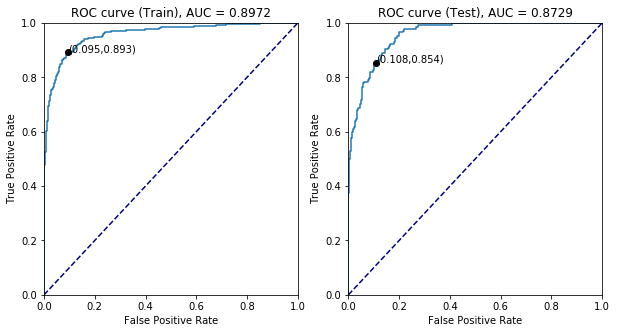

Cut-off: 0.10520401161557813


In [125]:
BestThreshold = plot_ROC(train_y,train_y_pred_prob, test_y, test_y_pred_prob)
print('Cut-off:', BestThreshold) # for training data

### Wine 데이터를 활용한 로지스틱 회귀분석 실습
다음으로는 wine 데이터를 활용하여 로지스틱회귀분석을 수행해 보도록 하겟습니다.

In [126]:
# 데이터 불러오기
dat = pd.read_csv("./data/classification_wine.csv")

# 데이터 예시 확인
print(dat.head(10) )


      V1    V2    V3    V4   V5    V6    V7    V8    V9   V10   V11   V12  \
0  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
1  14.10  2.16  2.30  18.0  105  2.95  3.32  0.22  2.38  5.75  1.25  3.17   
2  14.12  1.48  2.32  16.8   95  2.20  2.43  0.26  1.57  5.00  1.17  2.82   
3  14.75  1.73  2.39  11.4   91  3.10  3.69  0.43  2.81  5.40  1.25  2.73   
4  13.05  2.05  3.22  25.0  124  2.63  2.68  0.47  1.92  3.58  1.13  3.20   
5  13.39  1.77  2.62  16.1   93  2.85  2.94  0.34  1.45  4.80  0.92  3.22   
6  14.02  1.68  2.21  16.0   96  2.65  2.33  0.26  1.98  4.70  1.04  3.59   
7  13.68  1.83  2.36  17.2  104  2.42  2.69  0.42  1.97  3.84  1.23  2.87   
8  13.48  1.81  2.41  20.5  100  2.70  2.98  0.26  1.86  5.10  1.04  3.47   
9  13.28  1.64  2.84  15.5  110  2.60  2.68  0.34  1.36  4.60  1.09  2.78   

    V13  Y  
0  1185  1  
1  1510  1  
2  1280  1  
3  1150  1  
4   830  1  
5  1195  1  
6  1035  1  
7   990  1  
8   920  1  
9   880  1  


In [127]:
dat_1 = dat[dat['Y']==1]

In [128]:
dat_2 = dat[dat['Y']==2]

In [129]:
dat_class_2 = pd.concat((dat_1, dat_2), axis=0)
print( dat_class_2.head(10) )

      V1    V2    V3    V4   V5    V6    V7    V8    V9   V10   V11   V12  \
0  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
1  14.10  2.16  2.30  18.0  105  2.95  3.32  0.22  2.38  5.75  1.25  3.17   
2  14.12  1.48  2.32  16.8   95  2.20  2.43  0.26  1.57  5.00  1.17  2.82   
3  14.75  1.73  2.39  11.4   91  3.10  3.69  0.43  2.81  5.40  1.25  2.73   
4  13.05  2.05  3.22  25.0  124  2.63  2.68  0.47  1.92  3.58  1.13  3.20   
5  13.39  1.77  2.62  16.1   93  2.85  2.94  0.34  1.45  4.80  0.92  3.22   
6  14.02  1.68  2.21  16.0   96  2.65  2.33  0.26  1.98  4.70  1.04  3.59   
7  13.68  1.83  2.36  17.2  104  2.42  2.69  0.42  1.97  3.84  1.23  2.87   
8  13.48  1.81  2.41  20.5  100  2.70  2.98  0.26  1.86  5.10  1.04  3.47   
9  13.28  1.64  2.84  15.5  110  2.60  2.68  0.34  1.36  4.60  1.09  2.78   

    V13  Y  
0  1185  1  
1  1510  1  
2  1280  1  
3  1150  1  
4   830  1  
5  1195  1  
6  1035  1  
7   990  1  
8   920  1  
9   880  1  


In [130]:
# Normalization
dat_processing_norm = preprocessing.minmax_scale(dat_class_2)
dat_processed = pd.DataFrame(dat_processing_norm)
dat_processed.columns = dat_class_2.columns
print(dat_processed.head(10))

         V1        V2        V3        V4        V5        V6        V7  \
0  0.572581  0.320158  0.700535  0.412371  0.336957  0.611511  0.592018   
1  0.825269  0.280632  0.502674  0.381443  0.380435  0.665468  0.609756   
2  0.830645  0.146245  0.513369  0.319588  0.271739  0.395683  0.412417   
3  1.000000  0.195652  0.550802  0.041237  0.228261  0.719424  0.691796   
4  0.543011  0.258893  0.994652  0.742268  0.586957  0.550360  0.467849   
5  0.634409  0.203557  0.673797  0.283505  0.250000  0.629496  0.525499   
6  0.803763  0.185771  0.454545  0.278351  0.282609  0.557554  0.390244   
7  0.712366  0.215415  0.534759  0.340206  0.369565  0.474820  0.470067   
8  0.658602  0.211462  0.561497  0.510309  0.326087  0.575540  0.534368   
9  0.604839  0.177866  0.791444  0.252577  0.434783  0.539568  0.467849   

         V8        V9       V10       V11       V12       V13    Y  
0  0.320755  0.836237  0.592992  0.333333  0.655602  0.646933  0.0  
1  0.169811  0.686411  0.602426  0.5

In [131]:
dat_processed.shape


(130, 14)

In [132]:
# 상수항 추가
dat_processed = sm.add_constant(dat_processed, has_constant='add')
print(dat_processed.head(20))

    const        V1        V2        V3        V4        V5        V6  \
0     1.0  0.572581  0.320158  0.700535  0.412371  0.336957  0.611511   
1     1.0  0.825269  0.280632  0.502674  0.381443  0.380435  0.665468   
2     1.0  0.830645  0.146245  0.513369  0.319588  0.271739  0.395683   
3     1.0  1.000000  0.195652  0.550802  0.041237  0.228261  0.719424   
4     1.0  0.543011  0.258893  0.994652  0.742268  0.586957  0.550360   
5     1.0  0.634409  0.203557  0.673797  0.283505  0.250000  0.629496   
6     1.0  0.803763  0.185771  0.454545  0.278351  0.282609  0.557554   
7     1.0  0.712366  0.215415  0.534759  0.340206  0.369565  0.474820   
8     1.0  0.658602  0.211462  0.561497  0.510309  0.326087  0.575540   
9     1.0  0.604839  0.177866  0.791444  0.252577  0.434783  0.539568   
10    1.0  0.543011  0.179842  0.636364  0.381443  0.304348  0.485612   
11    1.0  0.543011  0.203557  0.395722  0.329897  0.402174  0.683453   
12    1.0  0.854839  0.652174  0.577540  0.427835  

In [133]:
dat_processed.columns.difference(["Y"])

Index(['V1', 'V10', 'V11', 'V12', 'V13', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'const'],
      dtype='object')

In [134]:
feature_columns = list(dat_processed.columns.difference(["Y"]))
feature_columns

['V1',
 'V10',
 'V11',
 'V12',
 'V13',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'const']

In [135]:
X = dat_processed[feature_columns]
y = dat_processed['Y'] # wine quality: 1 or 0

In [136]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.1, random_state=2017010500)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(117, 14) (13, 14) (117,) (13,)


In [137]:
dat_processed.dtypes


const    float64
V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
Y        float64
dtype: object

In [138]:
# 모델 구축 및 학습
model = sm.Logit(train_y, train_x)
results = model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 34
         Function evaluations: 37
         Gradient evaluations: 37


In [139]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))
print("model BIC: ","{:.5f}".format(results.bic))
results.summary()

model AIC:  28.00189
model BIC:  66.67233


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  117
Model:                          Logit   Df Residuals:                      103
Method:                           MLE   Df Model:                           13
Date:                Tue, 16 Jul 2019   Pseudo R-squ.:                   1.000
Time:                        21:52:24   Log-Likelihood:            -0.00094735
converged:                       True   LL-Null:                       -80.580
                                        LLR p-value:                 1.148e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1          -131.3890        nan        nan        nan         nan         nan
V10          -77.3007        nan        nan        nan         nan         nan
V11           87.8636        nan        nan        nan         nan         nan
V12           -9.8595        nan        nan        nan         nan         nan
V13         -172.4788        nan        nan        nan         nan         nan
V2           -33.9721        nan        nan        nan         nan         nan
V3          -117.7264        nan        nan        nan         nan         nan
V4            96.9049        nan        nan        nan         nan         nan
V5           -40.2736        nan        nan        nan         nan         nan
V6             7.6310        nan        nan        nan         nan         nan
V7           -35.6265        nan        nan        nan         nan         nan
V8            38.1382        nan        nan        nan         nan         nan
V9            36.9072        nan        nan        nan         nan         nan
const        161.2942        nan        nan        nan         nan         nan
==============================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [140]:
train_y_pred = results.predict(train_x)
print(train_y_pred.head(10))

23     9.988729e-44
129    1.000000e+00
82     1.000000e+00
92     1.000000e+00
118    1.000000e+00
68     1.000000e+00
96     1.000000e+00
123    1.000000e+00
0      2.666831e-39
10     2.598862e-23
dtype: float64


In [141]:
test_y_pred = results.predict(test_x)
print(test_y_pred.head(20))

83     1.000000e+00
84     1.000000e+00
31     2.497188e-84
111    1.000000e+00
43     1.173782e-49
105    1.000000e+00
57     3.905277e-49
108    1.000000e+00
71     1.000000e+00
26     1.524508e-62
7      1.302212e-13
85     1.000000e+00
45     1.699351e-49
dtype: float64


In [142]:
# Cut-off 정의
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [143]:
train_y_pred_prob = results.predict(train_x)
train_y_pred = cut_off(train_y_pred_prob,0.5)
print( train_y_pred.head(10) )

23     0
129    1
82     1
92     1
118    1
68     1
96     1
123    1
0      0
10     0
dtype: int64


In [144]:
test_y_pred_prob = results.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob,0.5)
print( test_y_pred.head(20) )

83     1
84     1
31     0
111    1
43     0
105    1
57     0
108    1
71     1
26     0
7      0
85     1
45     0
dtype: int64


In [145]:
test_y_pred_prob = results.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob,0.5)
print( test_y_pred.head(10) )

83     1
84     1
31     0
111    1
43     0
105    1
57     0
108    1
71     1
26     0
dtype: int64


In [146]:
# confusion matrix: Training set
cm_train = confusion_matrix(train_y,train_y_pred)
print( cm_train )

[[53  0]
 [ 0 64]]


In [147]:
# confusion matrix: Test set
cm_test = confusion_matrix(test_y,test_y_pred)
print( cm_test)

[[6 0]
 [0 7]]


In [148]:
# performance evaluation
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])

In [149]:

print('Test performance of Logistic Regression')
print('TPR:',perf_eval(cm_test)[0])
print('TNR:',perf_eval(cm_test)[1])
print('ACC:',perf_eval(cm_test)[2])
print('BCR:',perf_eval(cm_test)[3])
print('F1:',perf_eval(cm_test)[4])

Test performance of Logistic Regression
TPR: 1.0
TNR: 1.0
ACC: 1.0
BCR: 1.0
F1: 1.0


In [150]:
# 임계값에 따른 비교
threshold = np.arange(0, 1, 0.1)
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [151]:
table = pd.DataFrame(columns=['TPR','TNR','ACC','BCR','F1'])
print(table)

Empty DataFrame
Columns: [TPR, TNR, ACC, BCR, F1]
Index: []


In [152]:
for i in threshold:
    test_y_pred_tmp = cut_off(test_y_pred_prob,i)
    cfmat = confusion_matrix(test_y, test_y_pred_tmp)
    table.loc[i] = perf_eval(cfmat)

In [153]:
table.index.name='threshold'
table.columns.name='performance'
print(table)

performance  TPR  TNR       ACC  BCR   F1
threshold                                
0.0          1.0  0.0  0.538462  0.0  0.7
0.1          1.0  1.0  1.000000  1.0  1.0
0.2          1.0  1.0  1.000000  1.0  1.0
0.3          1.0  1.0  1.000000  1.0  1.0
0.4          1.0  1.0  1.000000  1.0  1.0
0.5          1.0  1.0  1.000000  1.0  1.0
0.6          1.0  1.0  1.000000  1.0  1.0
0.7          1.0  1.0  1.000000  1.0  1.0
0.8          1.0  1.0  1.000000  1.0  1.0
0.9          1.0  1.0  1.000000  1.0  1.0


In [154]:
# plotting: ROC, AUC curve 

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    
    # Plotting ROC Curve for Train 
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])
    
    # Plotting ROC Curve for Test 
    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold



Train Accuracy: 0.9829059829059829 
Train AUC: 0.984375 
Train Confusion Matrix:
[[53  0]
 [ 2 62]]
Test Accuracy: 1.0 
Test AUC: 1.0 
Test Confusion Matrix:
[[6 0]
 [0 7]]


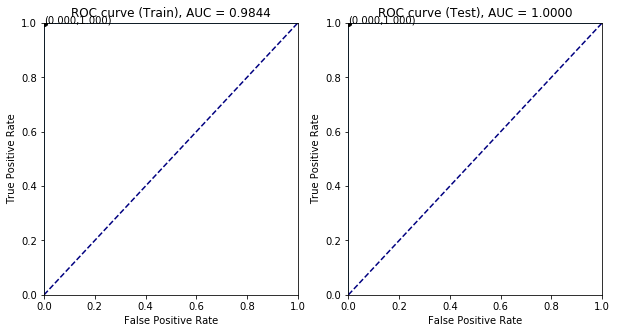

Cut-off: 0.9995264943078366


In [155]:
BestThreshold = plot_ROC(train_y,train_y_pred_prob, test_y, test_y_pred_prob)
print('Cut-off:', BestThreshold) # for training data

## **실습 수행**
2.로지스틱 회귀분석(실습)노트북을 통해서 statsmodels 패키지를 이용하여 파킨슨데이터를 대상으로 로지스틱 회귀모형을 직접 수행해보도록 하겠습니다. 

좌측 탐색기에서 **2.1_LogisticRegression_ex.ipynb**을 수행해주세요.

## **다중 클래스 로지스틱 회귀분석 실습**

분류하고자하는 타겟변수(class)가 2개 이상인 경우를 대상으로 실습을 수행해 보도록하겠습니다.

In [156]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

##### 데이터 불러오기
이번에 실습에 사용할  데이터는 __UCI machine learning Repository__ 에서 제공하는 glass 데이터를 사용하고자 합니다.

Glass Data : "https://archive.ics.uci.edu/ml/datasets/Glass+Identification"

#### Glass Data 불러오기

In [157]:

glass_data_path = './data/glass.txt'
glass_data_variables = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]

glass_data = pd.read_csv(glass_data_path,names=glass_data_variables)


#### Data 확인하기

In [158]:
print( "Number of observations :: ", len(glass_data.index))
print( "Number of columns :: ", len(glass_data.columns))
print( "Headers :: ", glass_data.columns.values)

print(glass_data.head(20))

Number of observations ::  214
Number of columns ::  11
Headers ::  ['Id' 'RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'glass-type']
    Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  glass-type
0    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00           1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00           1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00           1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00           1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00           1
5    6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26           1
6    7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00           1
7    8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00           1
8    9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00           1
9   10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11           1
10  11  1.51571  12.7

In [159]:
print( "Target :: ", glass_data[glass_data_variables[-1]][:10])

Target ::  0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: glass-type, dtype: int64


### 학습 검증 데이터 정의

***train_test_split( )*** 함수는 특적 array나 matrix을 학습과 검증데이터로 나누어주는 함수입니다.

**arrays* : sequence of indexables with same length / shape[0]
Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

**test_size** : float, int or None, optional (default=0.25)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. By default, the value is set to 0.25. The default will change in version 0.21. It will remain 0.25 only if train_size is unspecified, otherwise it will complement the specified train_size.

**train_size** : float, int, or None, (default=None)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

**random_state** : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

**shuffle** : boolean, optional (default=True)
Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

**stratify** : array-like or None (default=None)
If not None, data is split in a stratified fashion, using this as the class labels.

In [160]:

train_x, test_x, train_y, test_y = train_test_split(glass_data[glass_data_variables[:-1]],
                                                    glass_data[glass_data_variables[-1]],
                                                    train_size=0.7)




In [161]:
# 단순 로지스틱 회귀 분석 수행
lr = linear_model.LogisticRegression()
lr.fit(train_x, train_y)
 
# 다중 선형회귀 분석 수행
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)

# 단일 선형회귀분석 성능 비교
print( "Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, lr.predict(train_x)) )
print( "Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x)) )

# 다중 선형회귀 분석
print( "Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, mul_lr.predict(train_x)) )
print( "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x)) )

Logistic regression Train Accuracy ::  0.9060402684563759
Logistic regression Test Accuracy ::  0.8461538461538461
Multinomial Logistic regression Train Accuracy ::  1.0
Multinomial Logistic regression Test Accuracy ::  0.9846153846153847


# **전진/후진/단계적 변수선택법**

### 앞서 배운 변수 선택법을 수행해보도록 하겠습니다.
로지스틱 회귀분석에서도 앞서 수행해본 회귀분석과 동일하게 변수선택법을 통해서 다양한 변수들의 조합을 통해서 최적의 모델을 적합 할 수가 있습니다. 해당 부분을 **personal loan 데이터(binary classification)**를 이용해서 실습을 진행해보도록 하겠습니다.

In [162]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] 
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [163]:
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [164]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329912
  

In [165]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.137663
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.134821
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131859
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131061
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.214795
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.142500
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.131057
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154241
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135440
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.152443
  

In [166]:
Stepwise_best_model = Stepwise_model(X=train_x,y=train_y)

Optimization terminated successfully.
         Current function value: 0.330076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324953
  

## Target의 확률 추정

In [167]:
# 모델에 의해 예측된/추정된 값 <->  test_y

# 모델 구축 및 학습
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')
pred_y_full = results.predict(test_x) # full model

pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])


Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


## Best cut-off를 사용하여 범주형으로 변환

Train Accuracy: 0.8737142857142857 
Train AUC: 0.8851121407920799 
Train Confusion Matrix:
[[1368  203]
 [  18  161]]
Test Accuracy: 0.8973333333333333 
Test AUC: 0.9082900754520368 
Test Confusion Matrix:
[[602  71]
 [  6  71]]


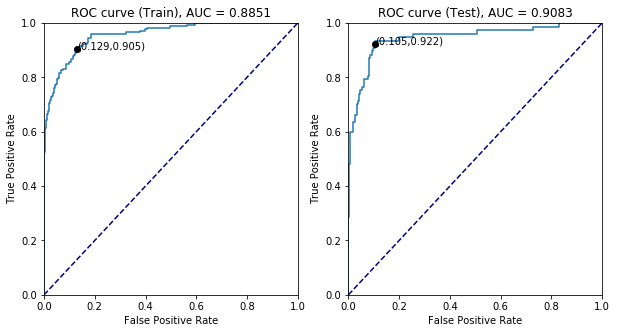

In [168]:
BestThreshold_full= plot_ROC(y_train_true=train_y, y_train_prob=results.predict(train_x),
         y_test_true=test_y, y_test_prob=results.predict(test_x))

Train Accuracy: 0.8742857142857143 
Train AUC: 0.8854304094107941 
Train Confusion Matrix:
[[1369  202]
 [  18  161]]
Test Accuracy: 0.8986666666666666 
Test AUC: 0.9032824530595704 
Test Confusion Matrix:
[[604  69]
 [  7  70]]


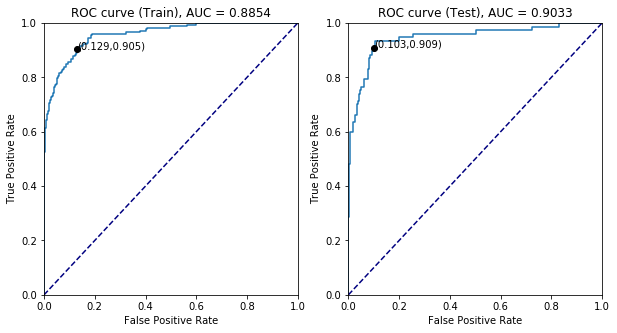

In [169]:
BestThreshold_forward = plot_ROC(train_y,Forward_best_model.predict(train_x[Forward_best_model.model.exog_names]),
                                 test_y,Forward_best_model.predict(test_x[Forward_best_model.model.exog_names]))

Train Accuracy: 0.8742857142857143 
Train AUC: 0.8854304094107941 
Train Confusion Matrix:
[[1369  202]
 [  18  161]]
Test Accuracy: 0.8986666666666666 
Test AUC: 0.9032824530595704 
Test Confusion Matrix:
[[604  69]
 [  7  70]]


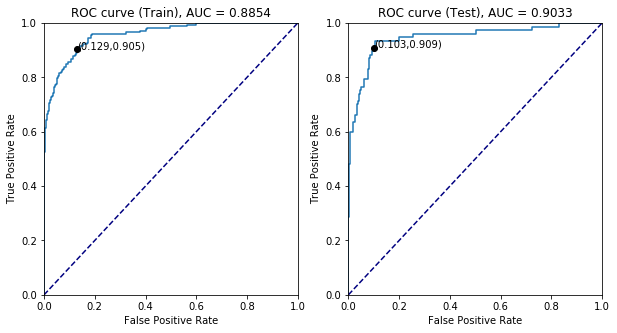

In [170]:
BestThreshold_backward = plot_ROC(train_y,Backward_best_model.predict(train_x[Backward_best_model.model.exog_names]),
                                 test_y,Backward_best_model.predict(test_x[Backward_best_model.model.exog_names]))

Train Accuracy: 0.8742857142857143 
Train AUC: 0.8854304094107941 
Train Confusion Matrix:
[[1369  202]
 [  18  161]]
Test Accuracy: 0.8986666666666666 
Test AUC: 0.9032824530595704 
Test Confusion Matrix:
[[604  69]
 [  7  70]]


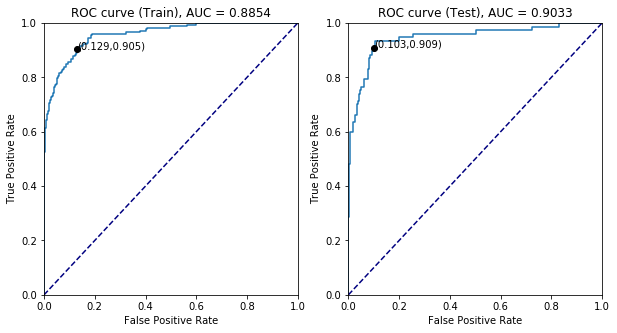

In [171]:
BestThreshold_stepwise = plot_ROC(train_y,Stepwise_best_model.predict(train_x[Stepwise_best_model.model.exog_names]),
                                 test_y,Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names]))

In [172]:
pred_Y_full= cut_off(pred_y_full,BestThreshold_full)
pred_Y_forward = cut_off(pred_y_forward,BestThreshold_forward)
pred_Y_backward = cut_off(pred_y_backward,BestThreshold_backward)
pred_Y_stepwise = cut_off(pred_y_stepwise,BestThreshold_stepwise)

## **혼동행렬으로 표현**

In [173]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

## **성능비교**

In [174]:
perf_mat = pd.DataFrame(columns=["TPR", "TNR", "ACC", "BCR","F1"],
                        index =['FULL', 'FORWARD','BACKWARD', 'STEPWISE'])


perf_mat.loc['FULL']=perf_eval(cfmat_full)
perf_mat.loc['FORWARD']=perf_eval(cfmat_forward)
perf_mat.loc['BACKWARD']=perf_eval(cfmat_backward)
perf_mat.loc['STEPWISE']=perf_eval(cfmat_stepwise)

In [175]:
perf_mat

,TPR,TNR,ACC,BCR,F1
FULL,0.922078,0.894502,0.897333,0.908185,0.648402
FORWARD,0.909091,0.897474,0.898667,0.903264,0.648148
BACKWARD,0.909091,0.897474,0.898667,0.903264,0.648148
STEPWISE,0.909091,0.897474,0.898667,0.903264,0.648148


In [176]:
print( perf_mat.loc['FORWARD','TNR'])

0.8974739970282318


In [177]:
print( perf_mat.iloc[:,1])

FULL        0.894502
FORWARD     0.897474
BACKWARD    0.897474
STEPWISE    0.897474
Name: TNR, dtype: object
